In [1]:
import cv2
import os
import matplotlib.pyplot as plt

# Input and output directories
input_folder = r"C:\Users\prita\OneDrive\Desktop\HYPERBOLA DETECTION LAB DATASET\images dataset"
output_folder = r"C:\Users\prita\OneDrive\Desktop\HYPERBOLA DETECTION LAB DATASET\1. cropped images"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Loop over all image files
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        image_path = os.path.join(input_folder, filename)

        # Load and convert to grayscale
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Get height and width
        height, width = gray.shape

        # Crop coordinates (as per your ratios)
        x_start = int((100 / 225) * width)
        x_end = int((170 / 225) * width)

        y_start = int((0 / 5) * height)
        y_end = int((1.75 / 5) * height)

        # Crop the image
        cropped = gray[y_start:y_end, x_start:x_end]

        # Save to output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, cropped)

print("✅ Cropping completed for all images.")


✅ Cropping completed for all images.


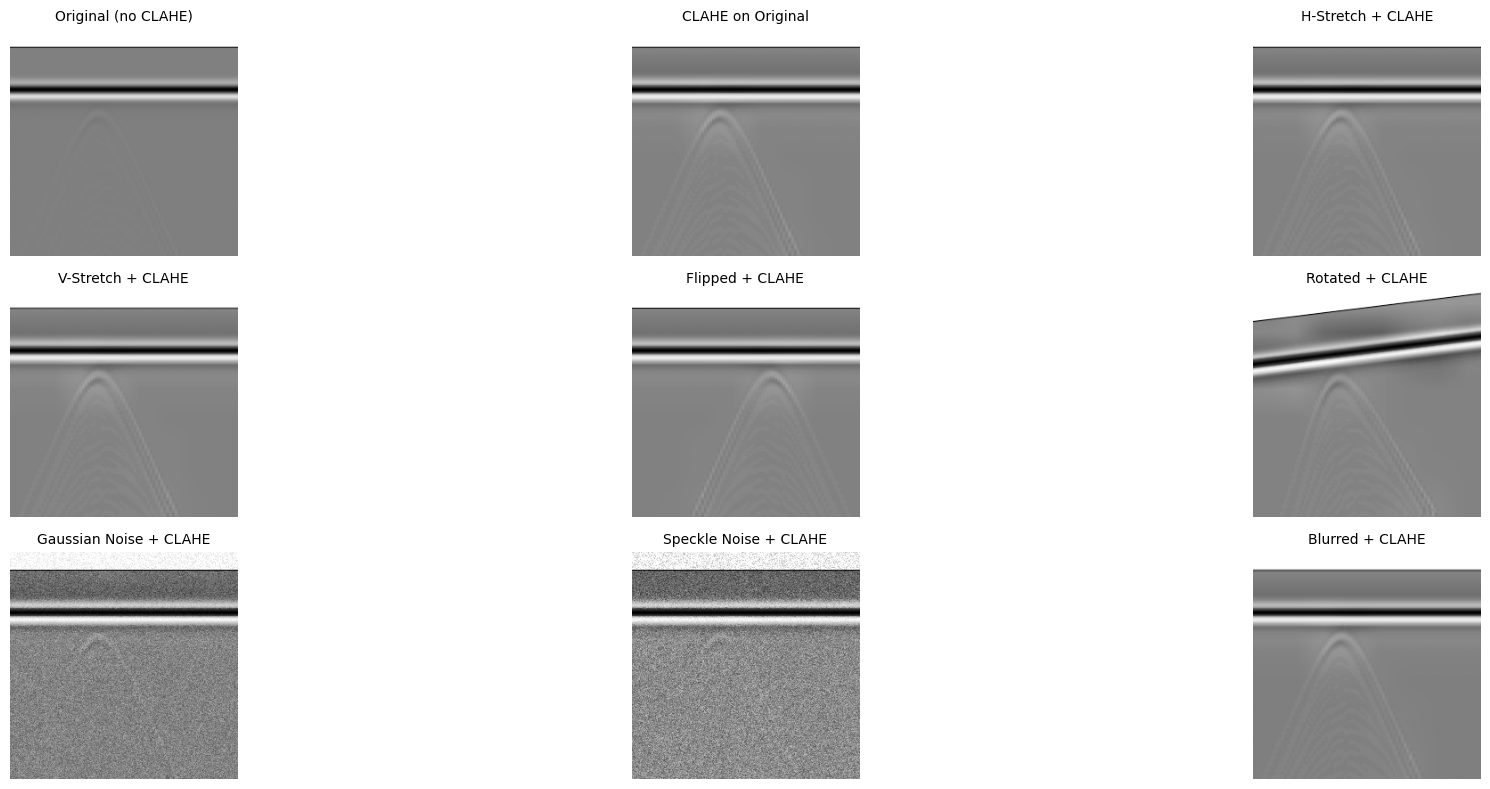

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Load grayscale image
img = cv2.imread(r"C:\Users\prita\OneDrive\Desktop\HYPERBOLA DETECTION LAB DATASET\1. cropped images\gpr_loamy_soil_r0_05_d0_4_a75__merged_rx1_Ez.png", cv2.IMREAD_GRAYSCALE)

# Resize original to 256x256
original = cv2.resize(img, (256, 256))

# CLAHE function
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# 1. Original (no CLAHE)
original_no_clahe = original

# 2. CLAHE contrast (on original)
clahe_img = apply_clahe(original)

# 3. Horizontal Stretch + CLAHE
h_stretch = cv2.resize(original, (300, 256))
h_stretch = cv2.resize(h_stretch, (256, 256))
h_stretch_clahe = apply_clahe(h_stretch)

# 4. Vertical Stretch + CLAHE
v_stretch = cv2.resize(original, (256, 300))
v_stretch = cv2.resize(v_stretch, (256, 256))
v_stretch_clahe = apply_clahe(v_stretch)

# 5. Flip + CLAHE
flipped = cv2.flip(original, 1)
flipped_clahe = apply_clahe(flipped)

# 6. Rotation (±10°) + CLAHE
def rotate_image(image, angle):
    h, w = image.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

rotated = rotate_image(original, angle=random.uniform(-10, 10))
rotated_clahe = apply_clahe(rotated)

# 7. Gaussian Noise + CLAHE
def add_gaussian_noise(image, mean=0, std=5):  # reduced from 10 to 5
    noise = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

gaussian_noisy = add_gaussian_noise(original)
gaussian_clahe = apply_clahe(gaussian_noisy)

# 8. Speckle Noise + CLAHE
def add_speckle_noise(image, factor=0.05):  # reduced from 0.2 to 0.05
    noise = np.random.randn(*image.shape)
    speckled = image + image * noise * factor
    return np.clip(speckled, 0, 255).astype(np.uint8)

speckle_noisy = add_speckle_noise(original)
speckle_clahe = apply_clahe(speckle_noisy)

# 9. Gaussian Blur + CLAHE
blurred = cv2.GaussianBlur(original, (3, 3), sigmaX=1.0)
blurred_clahe = apply_clahe(blurred)

# Combine all images
titles = [
    'Original (no CLAHE)', 'CLAHE on Original', 'H-Stretch + CLAHE', 'V-Stretch + CLAHE',
    'Flipped + CLAHE', 'Rotated + CLAHE', 'Gaussian Noise + CLAHE',
    'Speckle Noise + CLAHE', 'Blurred + CLAHE'
]

images = [
    original_no_clahe, clahe_img, h_stretch_clahe, v_stretch_clahe, flipped_clahe,
    rotated_clahe, gaussian_clahe, speckle_clahe, blurred_clahe
]

# Plot
plt.figure(figsize=(22, 8))
for i in range(len(images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Input and output directories
input_dir = r"C:\Users\prita\OneDrive\Desktop\HYPERBOLA DETECTION LAB DATASET\1. cropped images"
output_dir = r"C:\Users\prita\OneDrive\Desktop\HYPERBOLA DETECTION LAB DATASET\2. augmented images"
os.makedirs(output_dir, exist_ok=True)

# CLAHE function
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    return clahe.apply(image)

# Rotation function
def rotate_image(image, angle):
    h, w = image.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT)

# Gaussian noise
def add_gaussian_noise(image, mean=0, std=5):
    noise = np.random.normal(mean, std, image.shape).astype(np.float32)
    noisy = image.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

# Speckle noise
def add_speckle_noise(image, factor=0.05):
    noise = np.random.randn(*image.shape)
    speckled = image + image * noise * factor
    return np.clip(speckled, 0, 255).astype(np.uint8)

# Process each image in the input directory
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        filepath = os.path.join(input_dir, filename)
        base_name = os.path.splitext(filename)[0]  # without extension

        # Load and resize
        img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        original = cv2.resize(img, (256, 256))

        # Save Original (no CLAHE)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}.png"), original)

        # 1. CLAHE
        clahe_img = apply_clahe(original)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_inclahe.png"), clahe_img)

        # 2. Horizontal Stretch + CLAHE
        h_stretch = cv2.resize(original, (300, 256))
        h_stretch = cv2.resize(h_stretch, (256, 256))
        h_stretch_clahe = apply_clahe(h_stretch)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_inhorizontalstretch.png"), h_stretch_clahe)

        # 3. Vertical Stretch + CLAHE
        v_stretch = cv2.resize(original, (256, 300))
        v_stretch = cv2.resize(v_stretch, (256, 256))
        v_stretch_clahe = apply_clahe(v_stretch)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_inverticalstretch.png"), v_stretch_clahe)

        # 4. Flip + CLAHE
        flipped = cv2.flip(original, 1)
        flipped_clahe = apply_clahe(flipped)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_inflip.png"), flipped_clahe)

        # 5. Rotation ±10° + CLAHE
        rotated = rotate_image(original, angle=random.uniform(-10, 10))
        rotated_clahe = apply_clahe(rotated)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_inrotation.png"), rotated_clahe)

        # 6. Gaussian Noise + CLAHE
        gaussian_noisy = add_gaussian_noise(original)
        gaussian_clahe = apply_clahe(gaussian_noisy)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_ingaussiannoise.png"), gaussian_clahe)

        # 7. Speckle Noise + CLAHE
        speckle_noisy = add_speckle_noise(original)
        speckle_clahe = apply_clahe(speckle_noisy)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_inspecklenoise.png"), speckle_clahe)

        # 8. Gaussian Blur + CLAHE
        blurred = cv2.GaussianBlur(original, (3, 3), sigmaX=1.0)
        blurred_clahe = apply_clahe(blurred)
        cv2.imwrite(os.path.join(output_dir, f"{base_name}_ingaussianblur.png"), blurred_clahe)

        print(f"Processed: {filename}")


Processed: gpr_clay_r0_05_d0_1_a15__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_1_a30__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_1_a45__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_1_a60__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_1_a75__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_2_a15__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_2_a30__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_2_a45__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_2_a60__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_2_a75__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_3_a15__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_3_a30__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_3_a45__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_3_a60__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_3_a75__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_4_a15__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_4_a30__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0_4_a45__merged_rx1_Ez.png
Processed: gpr_clay_r0_05_d0

In [5]:
!pip install labelImg

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261579 sha256=eae3a0df488bf443b4e0088cad968fbf4da500a1014e52d9a5c101d4253e7166
  Stored in directory: c:\users\prita\appdata\local\pip\cache\wheels\5d\3a\41\1ac6345ec3661b3ed702ea3a33d64f84ef87b71599cd6e64a9
Successfully built labelImg


  DEPRECATION: Building 'labelImg' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'labelImg'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [9]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

def convert_pascalvoc_to_csv(xml_folder, image_folder, output_csv):
    rows = []
    for xml_file in os.listdir(xml_folder):
        if not xml_file.endswith(".xml"):
            continue
        tree = ET.parse(os.path.join(xml_folder, xml_file))
        root = tree.getroot()
        filename = root.find("filename").text
        full_path = os.path.join(image_folder, filename)
        for obj in root.findall("object"):
            label = obj.find("name").text
            bbox = obj.find("bndbox")
            x1 = int(float(bbox.find("xmin").text))
            y1 = int(float(bbox.find("ymin").text))
            x2 = int(float(bbox.find("xmax").text))
            y2 = int(float(bbox.find("ymax").text))
            rows.append([full_path, x1, y1, x2, y2, label])
    df = pd.DataFrame(rows, columns=["path", "x1", "y1", "x2", "y2", "class"])
    df.to_csv(output_csv, index=False)
    print(f"✅ CSV saved to {output_csv}")


In [10]:
convert_pascalvoc_to_csv(
    xml_folder=r"C:\Users\prita\OneDrive\Desktop\HYPERBOLA DETECTION LAB DATASET\3. bounding boxes", 
    image_folder=r"C:\Users\prita\OneDrive\Desktop\HYPERBOLA DETECTION LAB DATASET\2. augmented images", 
    output_csv=r"C:\Users\prita\OneDrive\Desktop\HYPERBOLA DETECTION LAB DATASET\annotations.csv"
)

✅ CSV saved to C:\Users\prita\OneDrive\Desktop\HYPERBOLA DETECTION LAB DATASET\annotations.csv
